In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [5]:
import pandas as pd


filepath = "C:\\Users\\Ananya\\anaconda3\\Dissertation - UL\\Music-Generation-with-AI-1\\Project\\data\\One_Direction_all_albums.parquet"
lyrics_df = pd.read_parquet(filepath)


print(lyrics_df.head())


          artist                                album  \
0  One Direction  Up All Night _The Souvenir Edition_   
1  One Direction  Up All Night _The Souvenir Edition_   
2  One Direction  Up All Night _The Souvenir Edition_   
3  One Direction  Up All Night _The Souvenir Edition_   
4  One Direction  Up All Night _The Souvenir Edition_   

                    track_title  track_n  \
0  What Makes You Beautiful.txt        1   
1  What Makes You Beautiful.txt        1   
2  What Makes You Beautiful.txt        1   
3  What Makes You Beautiful.txt        1   
4  What Makes You Beautiful.txt        1   

                                               lyric  line  year  
0  134 ContributorsTranslationsEspañolPortuguêsFr...     1  2011  
1               You're insecure, don't know what for     2  2011  
2  You're turnin' heads when you walk through the...     3  2011  
3                Don't need makeup to cover up (Huh)     4  2011  
4               Bein' the way that you are is enough     

In [4]:

lyrics_df

,artist,album,track_title,track_n,lyric,line,year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [6]:
lyrics_df.columns = ['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line', 'Year']
lyrics_df


,Artist,Album,Track_title,Track_number,Lyric,Line,Year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [7]:
lyrics_df['Year'] = lyrics_df['Year'].astype('int')
lyrics_df

,Artist,Album,Track_title,Track_number,Lyric,Line,Year
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011
...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014


In [8]:
lyrics_df.describe()

,Track_number,Line,Year
count,4139.000000,4139.000000,4139.000000
mean,9.272771,31.372312,2012.950713
std,5.301655,18.848851,1.428491
min,1.000000,1.000000,2011.000000
25%,5.000000,16.000000,2012.000000
50%,9.000000,30.000000,2013.000000
75%,14.000000,46.000000,2014.000000
max,20.000000,80.000000,2015.000000


In [9]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        4139 non-null   object
 1   Album         4139 non-null   object
 2   Track_title   4139 non-null   object
 3   Track_number  4139 non-null   int64 
 4   Lyric         4139 non-null   object
 5   Line          4139 non-null   int64 
 6   Year          4139 non-null   int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 210.3+ KB


In [10]:
#checking for null values
lyrics_df.isnull().sum()

Artist          0
Album           0
Track_title     0
Track_number    0
Lyric           0
Line            0
Year            0
dtype: int64

looking at the number of albums and songs

In [11]:
lyrics_df.columns

Index(['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line',
       'Year'],
      dtype='object')

In [12]:
info_album = lyrics_df.groupby(['Album', 'Year'])['Track_number'].nunique().reset_index()
info_album.rename(columns={'Track_number': 'number_of_tracks'}, inplace=True)
sorted_info_album = info_album.sort_values(by='Year')

sorted_info_album

,Album,Year,number_of_tracks
5,Up All Night _The Souvenir Edition_,2011,18
4,Take Me Home _Expanded Edition_,2012,20
3,Midnight Memories _The Ultimate Edition_,2013,18
0,FOUR _The Ultimate Edition_,2014,16
1,Made in the A.M. (Deluxe),2015,1
2,Made in the A.M. _Deluxe_,2015,17


it can be noticed that our lyrics contain capital letters and punctuation. So, we will be lowering the letters and removing punctuation 

In [13]:
#creating a translation table which maps punctuations to none
#with the exception of apostrophes
punct_except_apos = string.punctuation.replace("'","")
translate_table = str.maketrans("", "", punct_except_apos)

lyrics_df['Lyrics_clean'] = lyrics_df['Lyric'].str.lower()

#now applying the translation table to each lyrics
lyrics_df['Lyrics_clean'] = lyrics_df['Lyrics_clean'].apply(lambda x: x.translate(translate_table))



lyrics_df

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,134 contributorstranslationsespañolportuguêsfr...
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you're insecure don't know what for
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you're turnin' heads when you walk through the...
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,don't need makeup to cover up huh
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough
...,...,...,...,...,...,...,...,...
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen
4135,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,60,2014,i wanna love like you made me feel
4136,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"When we were eighteen (Eighteen, yeah)",61,2014,when we were eighteen eighteen yeah
4137,One Direction,FOUR _The Ultimate Edition_,18.txt,16,I wanna love like you made me feel,62,2014,i wanna love like you made me feel


we can see that there are some unwanted lines which are not part of the song lyrics 

In [14]:
print(lyrics_df['Lyrics_clean'][0])

134 contributorstranslationsespañolportuguêsfrançaisdeutschwhat makes you beautiful lyrics


so in order to remove such lines, we will be defining a function with regular expressions

In [39]:
import re

def clean_remove_lyrics(df, col_name):

    #regular expression that identifies unwanted lines which do not contain lyrics

    pattern = re.compile(r"^\d+|\b(Contributors|Translations|Lyrics|Español|Português|Français|Deutsch)\b", re.IGNORECASE)

    #to clean individual lyric entries
    def clean__text(text):
        lines = text.split('\n')
        clean_line = [line for line in lines if not pattern.search(line)]
        return '\n'.join(clean_line)
    
    df[col_name] = lyrics_df[col_name].apply(clean__text)
    
    return df


lyrics_df2 = clean_remove_lyrics(lyrics_df, 'Lyrics_clean')
lyrics_df2



,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,,0
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


In [16]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is", "that's": "that is" , "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": 
                       "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                        "you'll've": "you will have", "you're": "you are", "you've": "you have",
                        "'bout": "about", "that'll": "that will", "'em": "them" }

In [40]:
import string

# Create a translation table that maps punctuation to None, except apostrophes
punctuation_except_apostrophe = string.punctuation.replace("'", "")
translation_table = str.maketrans("", "", punctuation_except_apostrophe)

lyrics_df2['Lyrics_clean'] = lyrics_df2['Lyrics_clean'].str.lower()

# Apply the translation to each lyric
lyrics_df2['Lyrics_clean'] = lyrics_df2['Lyrics_clean'].apply(lambda x: x.translate(translation_table))

for contraction, replacement in contractions.items():
    lyrics_df2['Lyrics_clean'] = lyrics_df2['Lyrics_clean'].str.replace(contraction, replacement, regex=False)

In [41]:
lyrics_df2.columns

Index(['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line',
       'Year', 'Lyrics_clean', 'word_count'],
      dtype='object')

In [42]:
lyrics_df2

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,,0
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


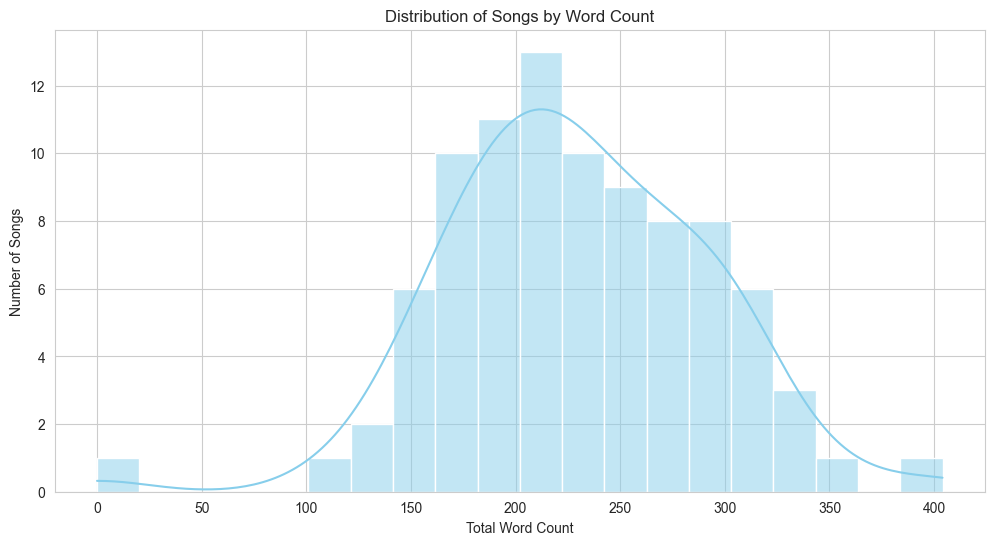

In [43]:
# Calculating word count distribution by song and creaating a column
lyrics_df2['word_count'] = lyrics_df2['Lyrics_clean'].apply(lambda x: len(x.split()) if x is not None else 0)

# Aggregating word count by song
word_ct_dist = lyrics_df2.groupby(['Album', 'Track_title'])['word_count'].sum().reset_index()

# Renaming columns for clarity
word_ct_dist.rename(columns={'word_count': 'total_word_count'}, inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(word_ct_dist['total_word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Songs by Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Number of Songs')
plt.show()

looking at how many duplicate rows we have and remove them. Usually, there is a tendency in songs to repeat phrases and I dont want to reinforce these words for my models

In [44]:
repetitive__rows = lyrics_df2['Lyrics_clean'].value_counts()
repetitive__rows = repetitive__rows[repetitive__rows > 1]

repetitive__rows

Lyrics_clean
                                                          90
one more one more can we try                               3
baby they do not know about they do not know about us      2
ohoh oh ow                                                 2
baby say yeah yeah yeah yeah yeah                          2
your last first kiss                                       2
baby i loved you first                                     2
kiss you once now i cannot leave                           2
the words you whispered i will always believe              2
in love with you in love in love with you with you         2
we are gonna wanna stay up all night                       2
the way you make it feel new new new                       2
hey                                                        2
oh and all the girls say                                   2
because i can love you more than this yeah                 2
nanana nanana                                              2
i am a thie

In [48]:
# dropping all duplicates
lyricsdf_deduplicated = lyrics_df2.drop_duplicates(subset='Lyric')
lyricsdf_deduplicated = lyrics_df2.drop_duplicates(subset='Lyrics_clean', keep='first')
lyricsdf_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
0,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,134 ContributorsTranslationsEspañolPortuguêsFr...,1,2011,,0
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


In [49]:
repetitive__rows2 = lyricsdf_deduplicated['Lyrics_clean'].value_counts()
repetitive__rows2 = repetitive__rows2[repetitive__rows2 > 1]

repetitive__rows2

Series([], Name: count, dtype: int64)

In [50]:
lyricsdf_deduplicated.isnull().sum()

Artist          0
Album           0
Track_title     0
Track_number    0
Lyric           0
Line            0
Year            0
Lyrics_clean    0
word_count      0
dtype: int64

It can be seen that after cleaning the lyrics, the previous non-lyrical row is still there but with an empty space or white space

In [52]:
lyricsdf_deduplicated['Lyrics_clean']

0                                                        
1                   you are insecure do not know what for
2       you are turnin' heads when you walk through th...
3                      do not need makeup to cover up huh
4                    bein' the way that you are is enough
                              ...                        
4121               and i wanna love like you made me feel
4124                                              oh lord
4126                             kiss me where i lay down
4134                       when we were eighteen eighteen
4136                  when we were eighteen eighteen yeah
Name: Lyrics_clean, Length: 2393, dtype: object

In [61]:
lyricsdf_deduplicated['Lyrics_clean'][0]

''

so creating a function that gives the count of all the rows that has such spaces and dropping them

In [67]:

def drop__emptylyrics(df, col_name):
    # Calculating the number of rows with empty lyrics (including only whitespace)
    empty_ct = df[col_name].str.strip().eq('').sum()
    print(f"Number of rows with empty '{col_name}': {empty_ct}")
    
    # Dropping the rows where the lyrics column is either empty or contains only whitespace
    df = df[df[col_name].str.strip().ne('')]
    
    return df


cleaned_lyrics_df_deduplicated = drop__emptylyrics(lyricsdf_deduplicated, 'Lyrics_clean')


cleaned_lyrics_df_deduplicated.head()


Number of rows with empty 'Lyrics_clean': 1


,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8


In [68]:
cleaned_lyrics_df_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


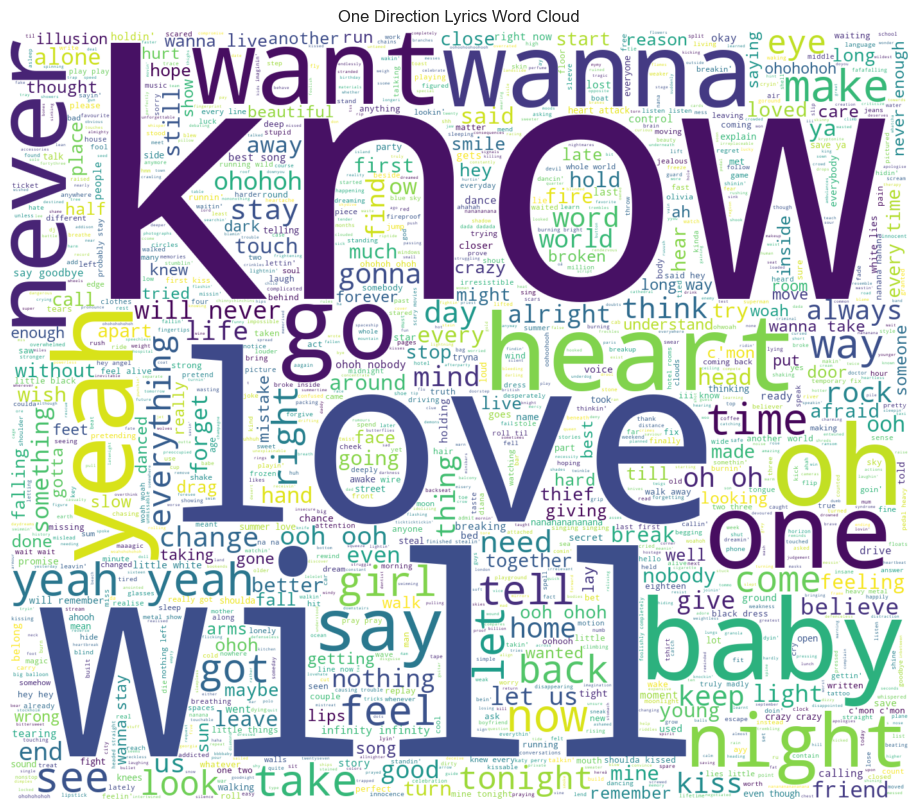

In [69]:
lyrics_txt = " ".join(lyric for lyric in cleaned_lyrics_df_deduplicated['Lyrics_clean'] if not pd.isnull(lyric))

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=10000,
    width=1400,
    height=1200
).generate(lyrics_txt)

plt.subplots(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('One Direction Lyrics Word Cloud')
plt.axis('off')
plt.show()


In [70]:
lyrics_txt = ' '.join(cleaned_lyrics_df_deduplicated['Lyrics_clean'].dropna())

#spitting the text into words
words = lyrics_txt.split()

#filtering out the stopwords

filtered_wrds =  [word for word in words if word.lower() not in STOPWORDS]

#count the frequency of the remaining words
word_freq = Counter(filtered_wrds)

# Get the most common words
most_common_wrds = word_freq.most_common(20)
most_common_wrds


[('know', 248),
 ('yeah', 244),
 ('will', 195),
 ('oh', 157),
 ('wanna', 123),
 ('never', 119),
 ('love', 116),
 ('baby', 102),
 ('one', 96),
 ('heart', 91),
 ('let', 89),
 ('say', 89),
 ('ooh', 86),
 ('now', 85),
 ('want', 84),
 ('go', 83),
 ('time', 79),
 ('night', 73),
 ('take', 73),
 ('way', 72)]

checking if there are non-ASCII Characteres in the text 

In [71]:
uniq_chars = set()

cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(lambda x: uniq_chars.update(set(x)))

sorted_uniq_chars = sorted(list(uniq_chars))

#filtering the non-ASCII characters from the sorted list
non_ascii = [char for char in sorted_uniq_chars if ord(char) > 127]

print("Non-ASCII Characters: ", non_ascii)

remove__chars = ''.join(non_ascii)

def remove__non_ascii(text, remove__chars):
    return ''.join(char for char in text if char not in remove__chars)


cleaned_lyrics_df_deduplicated.loc[cleaned_lyrics_df_deduplicated['Lyrics_clean'].notna(), 'Lyrics_clean'] = cleaned_lyrics_df_deduplicated.loc[cleaned_lyrics_df_deduplicated['Lyrics_clean'].notna(), 'Lyrics_clean'].apply(lambda x: remove__non_ascii(x, remove__chars))
print("\nCleaned DataFrame:")
print(cleaned_lyrics_df_deduplicated)

Non-ASCII Characters:  ['â', '—', '’', '”', '€', '™']

Cleaned DataFrame:
             Artist                                Album  \
1     One Direction  Up All Night _The Souvenir Edition_   
2     One Direction  Up All Night _The Souvenir Edition_   
3     One Direction  Up All Night _The Souvenir Edition_   
4     One Direction  Up All Night _The Souvenir Edition_   
5     One Direction  Up All Night _The Souvenir Edition_   
...             ...                                  ...   
4121  One Direction          FOUR _The Ultimate Edition_   
4124  One Direction          FOUR _The Ultimate Edition_   
4126  One Direction          FOUR _The Ultimate Edition_   
4134  One Direction          FOUR _The Ultimate Edition_   
4136  One Direction          FOUR _The Ultimate Edition_   

                       Track_title  Track_number  \
1     What Makes You Beautiful.txt             1   
2     What Makes You Beautiful.txt             1   
3     What Makes You Beautiful.txt             1 

In [72]:
cleaned_lyrics_df_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


In [73]:


# Function to remove non-ASCII characters from text
def remove_non_ascii_txt(text):
    # Keeping only ASCII characters
    filtered_text = ''.join(char for char in text if ord(char) <= 127)
    return filtered_text


# Applying the function to clean the 'Lyrics_clean' column
#cleaned_lyrics_df_deduplicated['Lyrics_clean'] = cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(remove_non_ascii_txt)

cleaned_lyrics_df_deduplicated.loc[cleaned_lyrics_df_deduplicated['Lyrics_clean'].notna(), 'Lyrics_clean'] = cleaned_lyrics_df_deduplicated.loc[cleaned_lyrics_df_deduplicated['Lyrics_clean'].notna(), 'Lyrics_clean'].apply(remove_non_ascii_txt)
print("\nCleaned DataFrame:")
print(cleaned_lyrics_df_deduplicated)



Cleaned DataFrame:
             Artist                                Album  \
1     One Direction  Up All Night _The Souvenir Edition_   
2     One Direction  Up All Night _The Souvenir Edition_   
3     One Direction  Up All Night _The Souvenir Edition_   
4     One Direction  Up All Night _The Souvenir Edition_   
5     One Direction  Up All Night _The Souvenir Edition_   
...             ...                                  ...   
4121  One Direction          FOUR _The Ultimate Edition_   
4124  One Direction          FOUR _The Ultimate Edition_   
4126  One Direction          FOUR _The Ultimate Edition_   
4134  One Direction          FOUR _The Ultimate Edition_   
4136  One Direction          FOUR _The Ultimate Edition_   

                       Track_title  Track_number  \
1     What Makes You Beautiful.txt             1   
2     What Makes You Beautiful.txt             1   
3     What Makes You Beautiful.txt             1   
4     What Makes You Beautiful.txt             1   

In [78]:
cleaned_lyrics_df_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8
...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5


checking for weird words

In [74]:
!pip install spellchecker


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
!pip uninstall spellchecker



^C


In [76]:
!pip install pyspellchecker


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from spellchecker import SpellChecker

spell = SpellChecker()

all_words = ' '.join(cleaned_lyrics_df_deduplicated['Lyrics_clean'].dropna()).split()
misspelled_wrds = spell.unknown(all_words)
corrected_wrds = {word: spell.correction(word) for word in misspelled_wrds}
no_correction = {word: correction for word, correction in corrected_wrds.items() if word == correction}

no_correction


{}

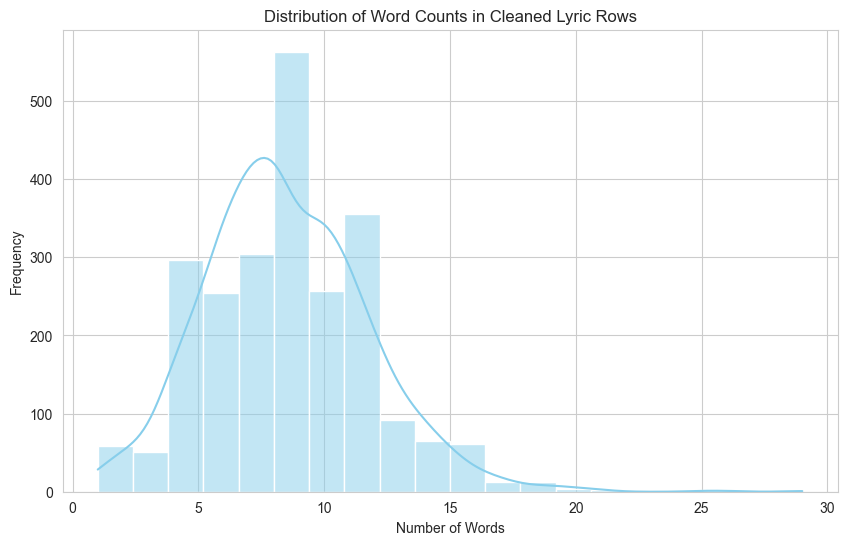

In [79]:

import seaborn as sns
import matplotlib.pyplot as plt


cleaned_lyrics_df_deduplicated.loc[:, 'word_count'] = cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(lambda x: len(x.split()))

# Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_lyrics_df_deduplicated['word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Cleaned Lyric Rows')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


identifying the number of unique words used per song and per album.

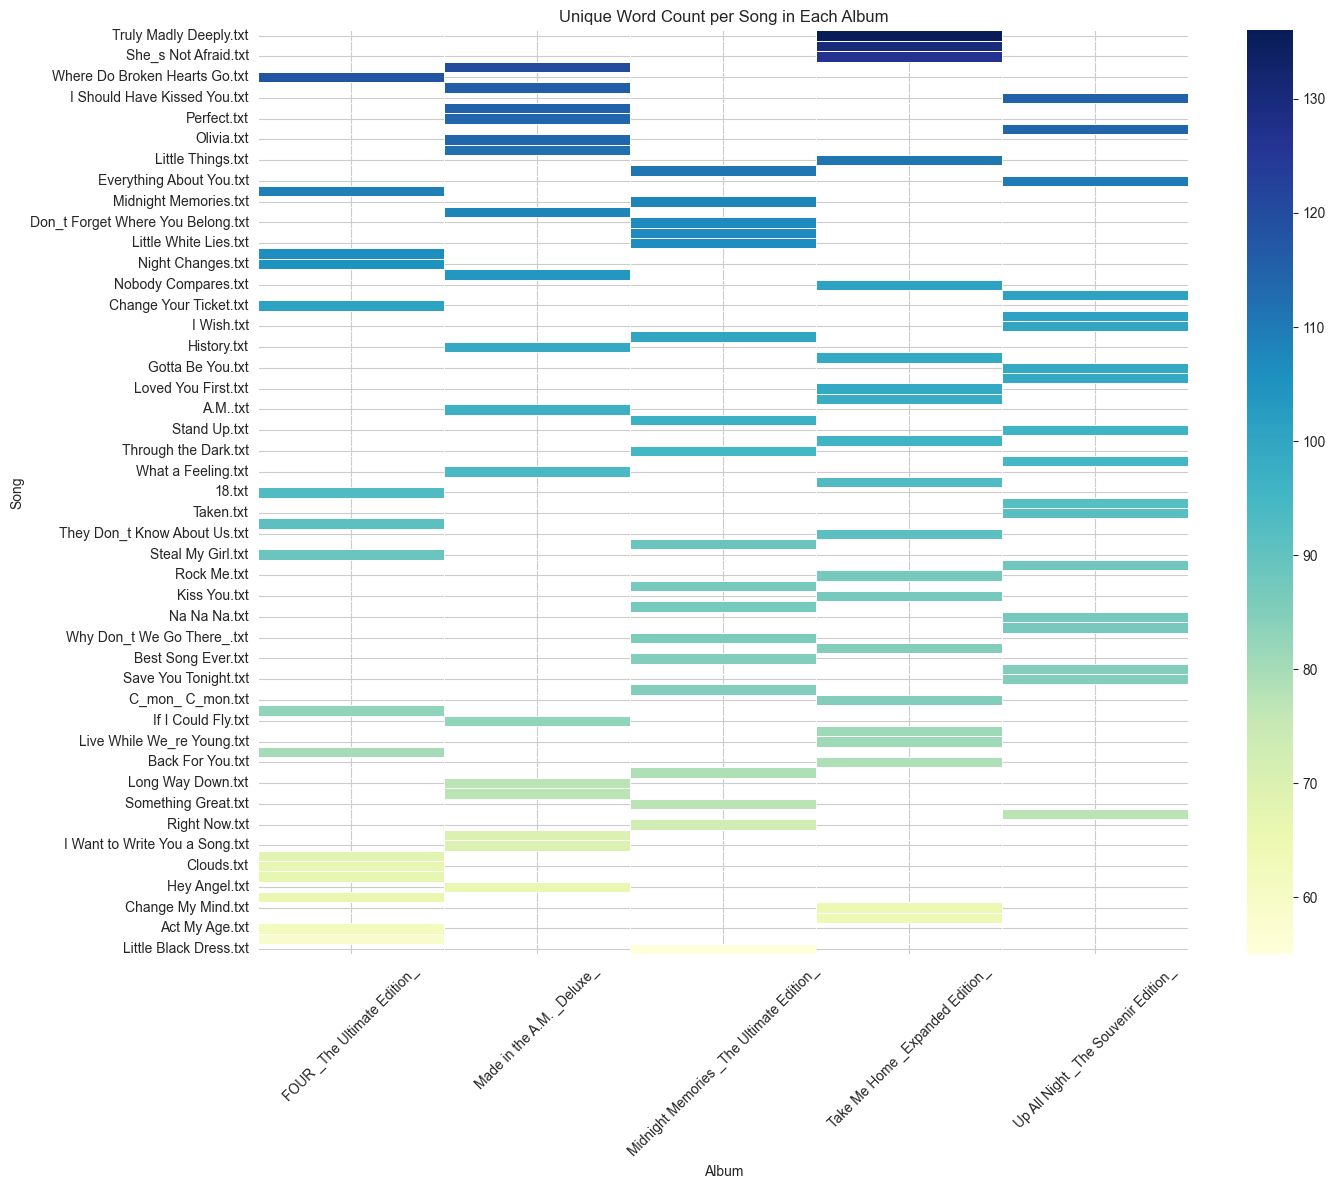

In [80]:
unique_word_ct = cleaned_lyrics_df_deduplicated.groupby(['Album', 'Track_title'])['Lyrics_clean'].apply(lambda x: len(set(' '.join(x).split()))).reset_index(name='unique_word_ct')

# Pivot the data for better visualization
pivot_data = unique_word_ct.pivot(index="Track_title", columns="Album", values="unique_word_ct")

unique_word_ct = cleaned_lyrics_df_deduplicated.groupby(['Album', 'Track_title'])['Lyrics_clean'].apply(lambda x: len(set(' '.join(x).split()))).reset_index(name='unique_word_ct')

pivot_data['total_unique_words'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('total_unique_words', ascending=False).drop('total_unique_words', axis=1)

plt.figure(figsize=(15, 12))
sns.heatmap(pivot_data,  cmap="YlGnBu", linewidths=.5)
plt.title('Unique Word Count per Song in Each Album')
plt.xlabel('Album')
plt.ylabel('Song')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

analysing the length of songs in terms of word count and character count

C:\Users\Ananya\AppData\Local\Temp\ipykernel_7996\3183530342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_lyrics_df_deduplicated.loc[:, 'character_count'] = cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(len)


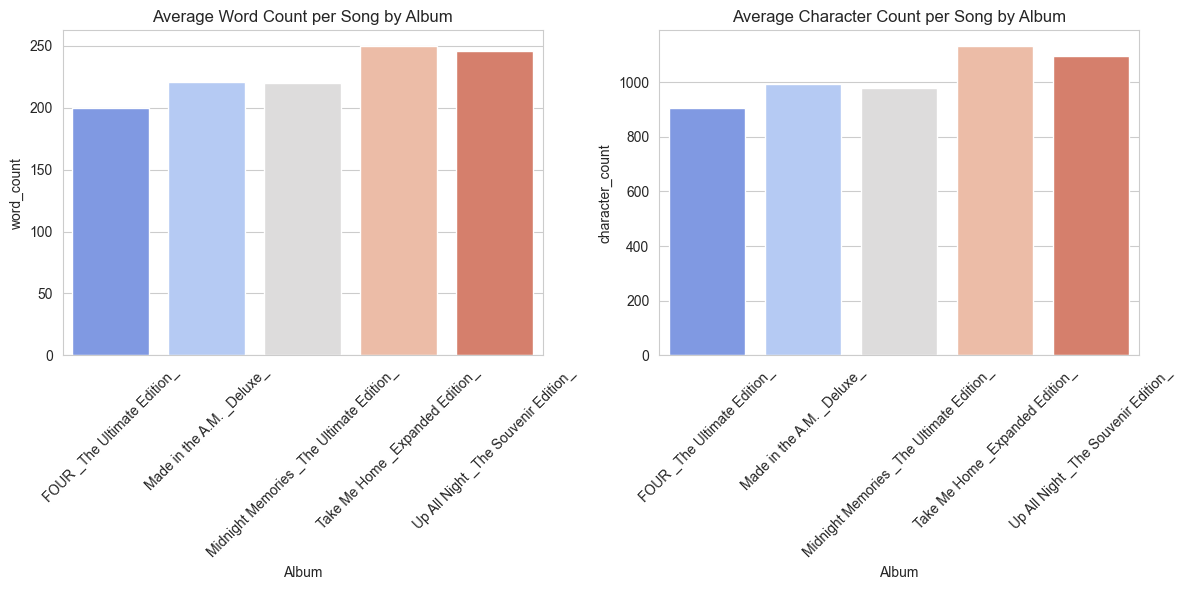

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cleaned_lyrics_df_deduplicated.loc[:, 'word_count'] = cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(lambda x: len(x.split()))
cleaned_lyrics_df_deduplicated.loc[:, 'character_count'] = cleaned_lyrics_df_deduplicated['Lyrics_clean'].apply(len)

# Group by 'Album' and 'Track_title', then calculate averages
album_lengths = cleaned_lyrics_df_deduplicated.groupby(['Album', 'Track_title']).agg({'word_count': 'sum', 'character_count': 'sum'}).groupby('Album').mean().reset_index()

plt.figure(figsize=(12, 6))

# Word count plot
plt.subplot(1, 2, 1)
sns.barplot(x='Album', y='word_count', hue='Album', data=album_lengths, palette='coolwarm', legend=True)
plt.title('Average Word Count per Song by Album')
plt.xticks(rotation=45)
plt.legend(title='Album').remove()  # Remove the legend explicitly

# Character count plot
plt.subplot(1, 2, 2)
sns.barplot(x='Album', y='character_count', hue='Album', data=album_lengths, palette='coolwarm', legend=True)
plt.title('Average Character Count per Song by Album')
plt.xticks(rotation=45)
plt.legend(title='Album').remove()

# Adjust layout to fit subplots neatly
plt.tight_layout()
plt.show()

In [82]:
cleaned_lyrics_df_deduplicated

,Artist,Album,Track_title,Track_number,Lyric,Line,Year,Lyrics_clean,word_count,character_count
1,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,"You're insecure, don't know what for",2,2011,you are insecure do not know what for,8,37
2,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,You're turnin' heads when you walk through the...,3,2011,you are turnin' heads when you walk through th...,10,52
3,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Don't need makeup to cover up (Huh),4,2011,do not need makeup to cover up huh,8,34
4,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Bein' the way that you are is enough,5,2011,bein' the way that you are is enough,8,36
5,One Direction,Up All Night _The Souvenir Edition_,What Makes You Beautiful.txt,1,Everyone else in the room can see it,8,2011,everyone else in the room can see it,8,36
...,...,...,...,...,...,...,...,...,...,...
4121,One Direction,FOUR _The Ultimate Edition_,18.txt,16,And I wanna love like you made me feel,37,2014,and i wanna love like you made me feel,9,38
4124,One Direction,FOUR _The Ultimate Edition_,18.txt,16,"Oh, lord",42,2014,oh lord,2,7
4126,One Direction,FOUR _The Ultimate Edition_,18.txt,16,Kiss me where I lay down,46,2014,kiss me where i lay down,6,24
4134,One Direction,FOUR _The Ultimate Edition_,18.txt,16,When we were eighteen (Eighteen),57,2014,when we were eighteen eighteen,5,30


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ananya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


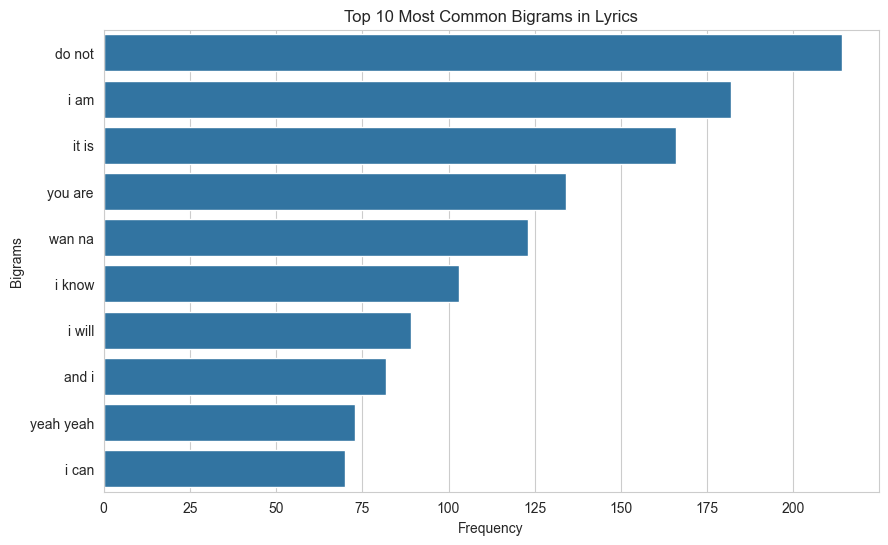

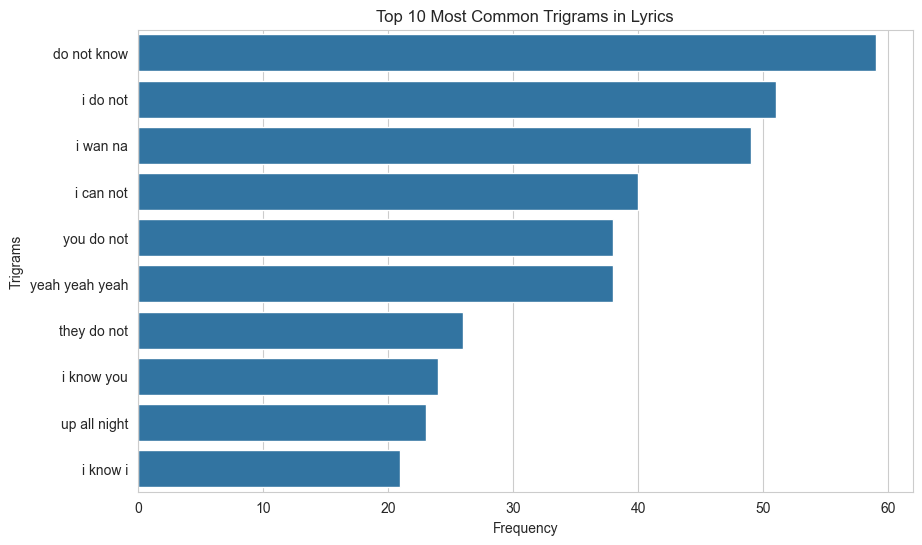

In [83]:
import nltk
from nltk import ngrams
from collections import Counter

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Combine all lyrics into one text
all_lyrics = ' '.join(cleaned_lyrics_df_deduplicated['Lyrics_clean'])

# Tokenize the text
words = nltk.word_tokenize(all_lyrics)

# Generate bigrams and trigrams
bigrams = ngrams(words, 2)
trigrams = ngrams(words, 3)

# Count and display the most common bigrams and trigrams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

most_common_bigrams = bigram_counts.most_common(10)
bigram_labels = [' '.join(bigram) for bigram, count in most_common_bigrams]
bigram_values = [count for bigram, count in most_common_bigrams]

most_common_trigrams = trigram_counts.most_common(10)
trigram_labels = [' '.join(trigram) for trigram, count in most_common_trigrams]
trigram_values = [count for trigram, count in most_common_trigrams]

# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_values, y=bigram_labels)
plt.title('Top 10 Most Common Bigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=trigram_values, y=trigram_labels)
plt.title('Top 10 Most Common Trigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

In [84]:
cleaned_lyrics_df_deduplicated.columns

Index(['Artist', 'Album', 'Track_title', 'Track_number', 'Lyric', 'Line',
       'Year', 'Lyrics_clean', 'word_count', 'character_count'],
      dtype='object')

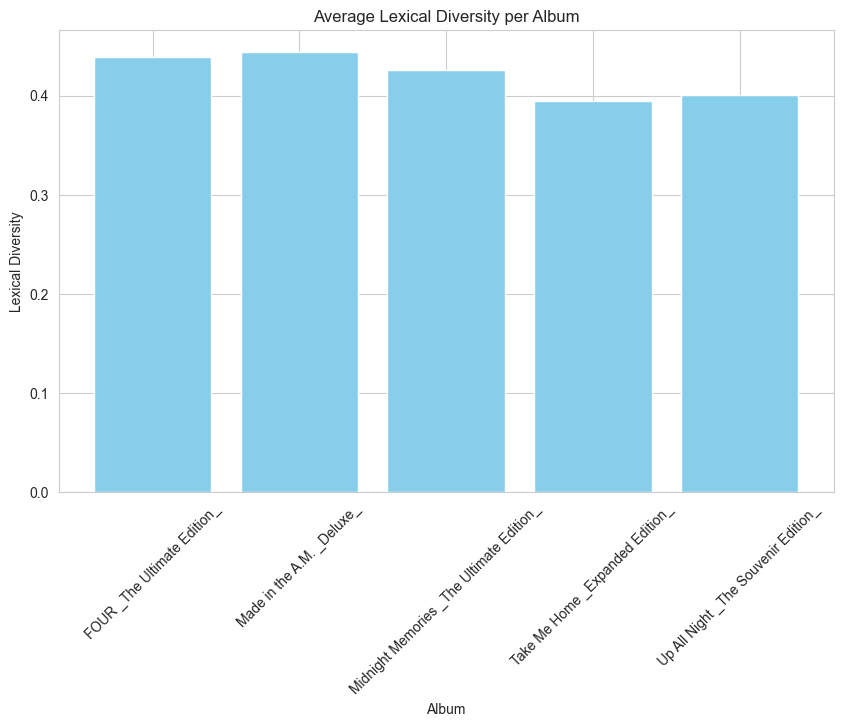

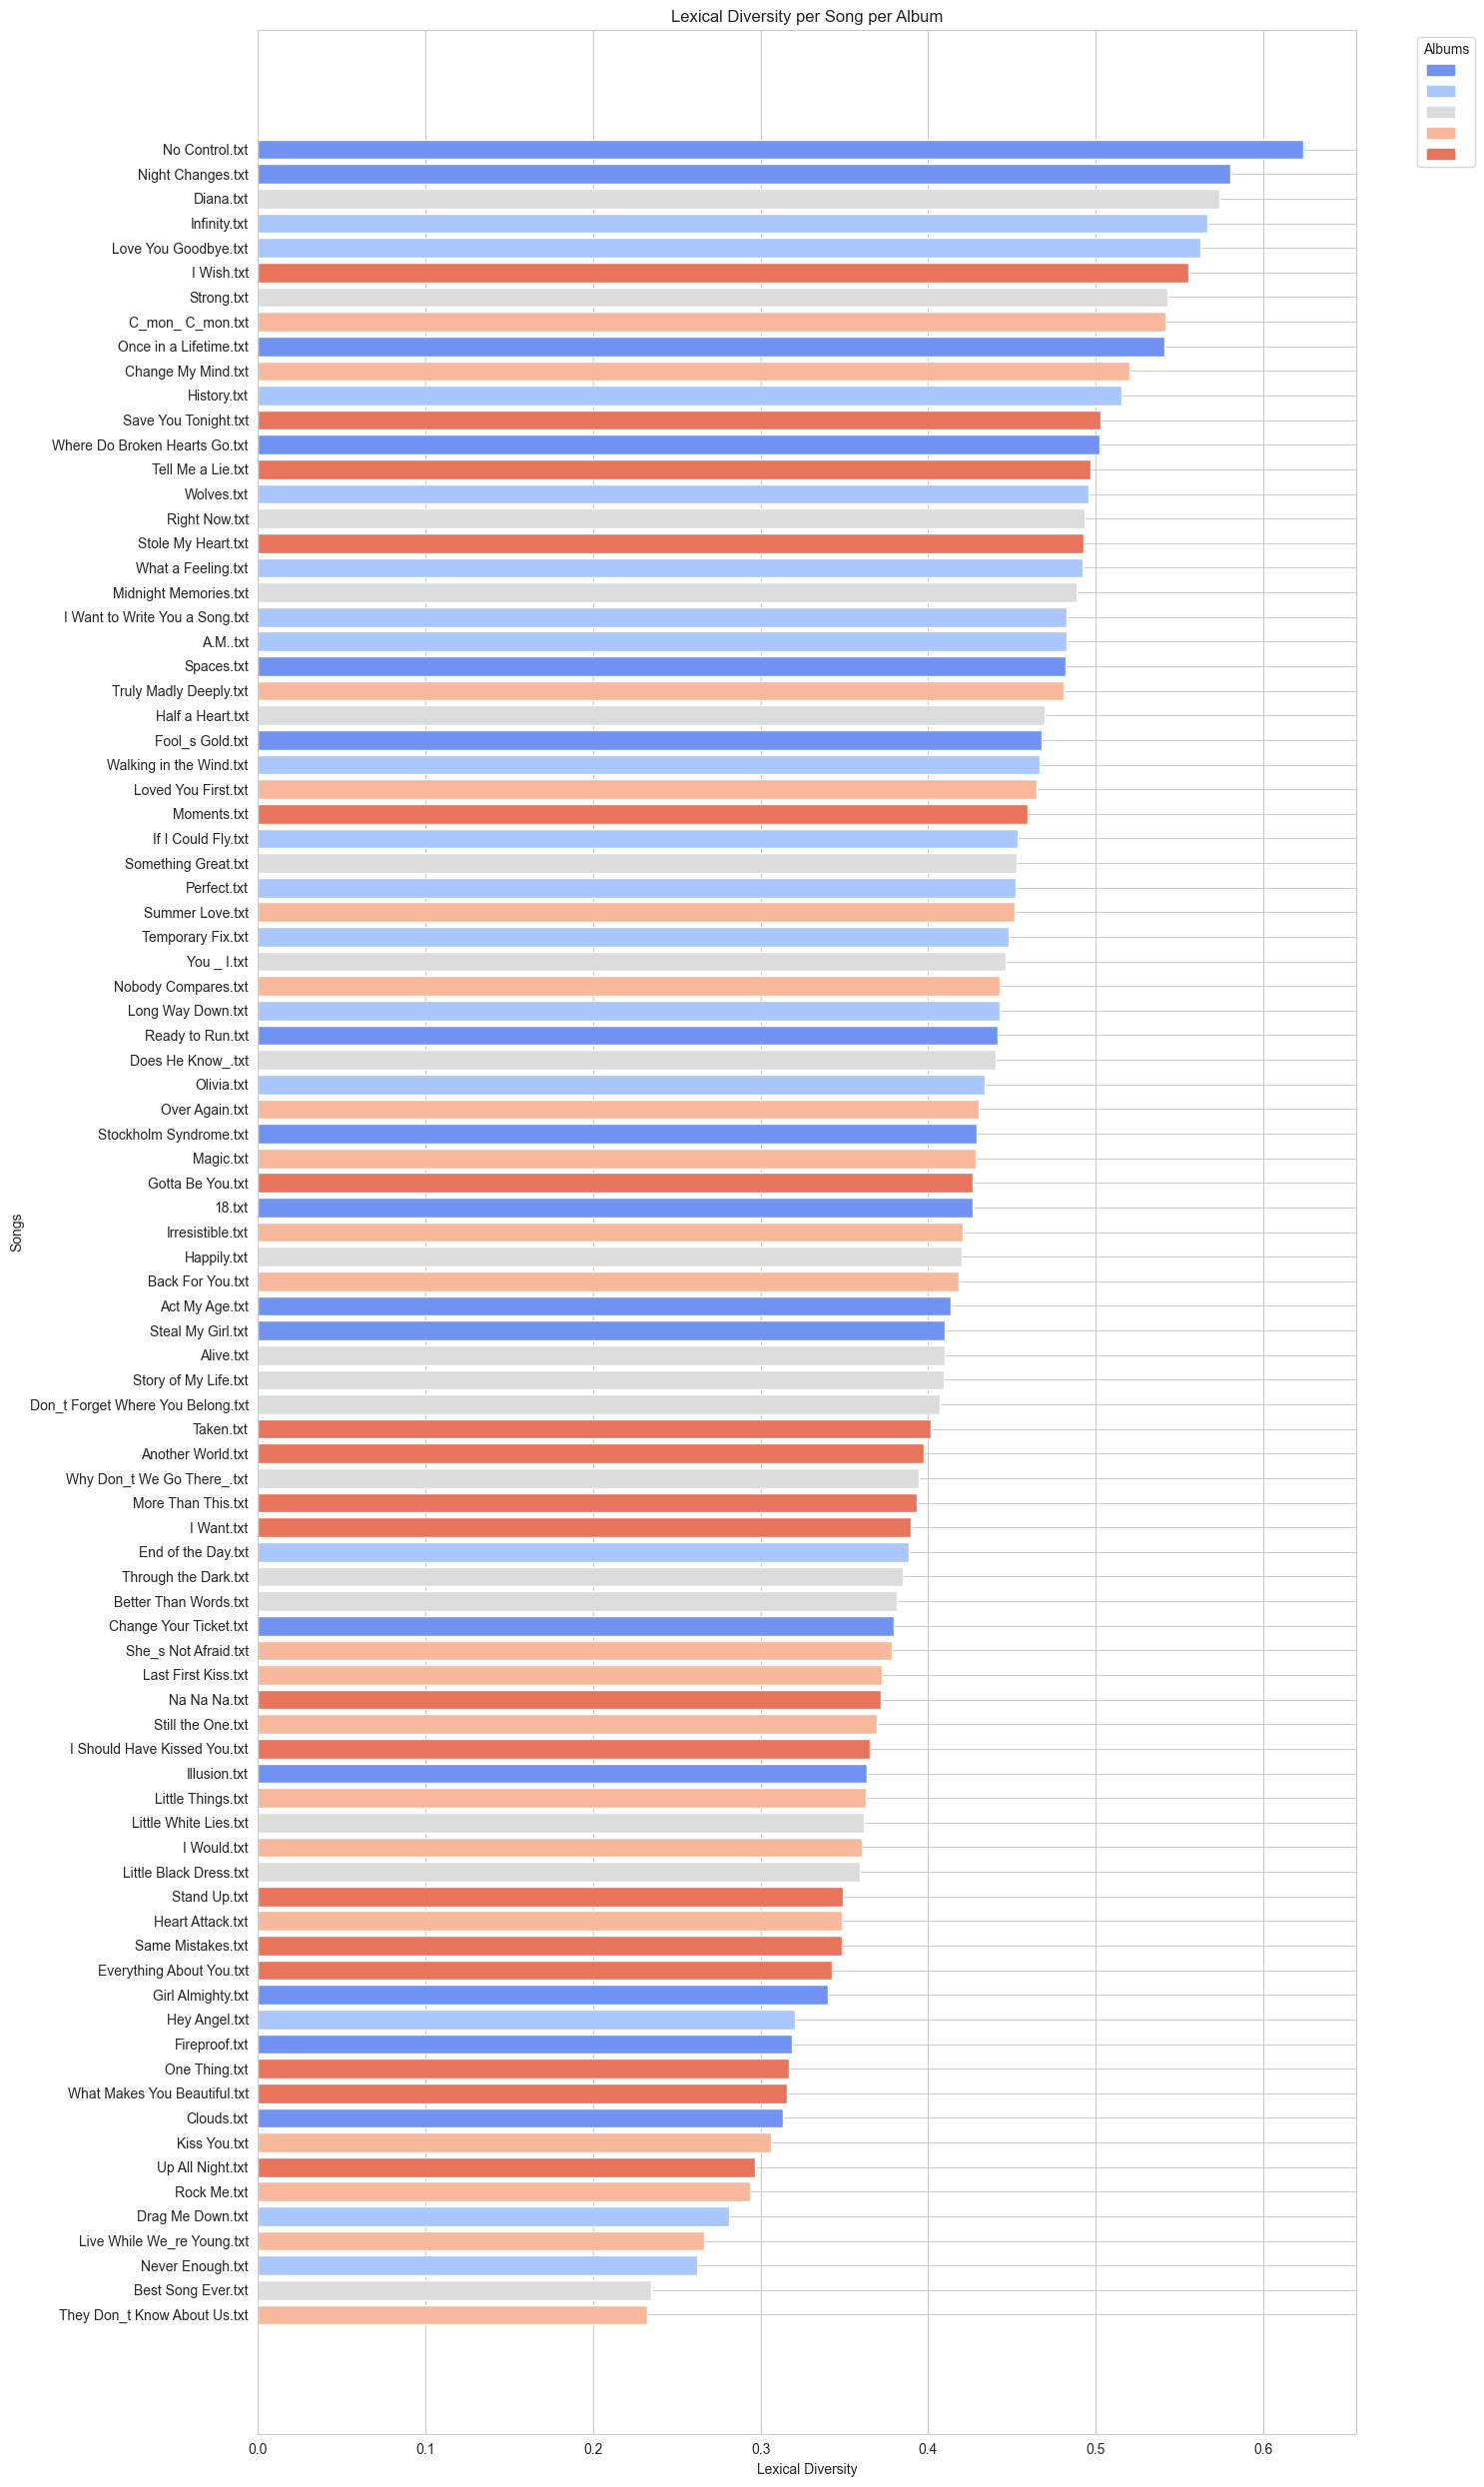

In [86]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

# Group lyrics by album and track title, and then combine them
grouped_lyrics = cleaned_lyrics_df_deduplicated.groupby(['Album', 'Track_title'])['Lyrics_clean'].apply(' '.join).reset_index()

# Calculate lexical diversity for each song
grouped_lyrics['lexical_diversity'] = grouped_lyrics['Lyrics_clean'].apply(lexical_diversity)
album_lexical_diversity = grouped_lyrics.groupby('Album')['lexical_diversity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(album_lexical_diversity['Album'], album_lexical_diversity['lexical_diversity'], color='skyblue')
plt.title('Average Lexical Diversity per Album')
plt.xlabel('Album')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=45)
plt.show()


palette = sns.color_palette("coolwarm", len(grouped_lyrics['Album'].unique()))

# Map each album to a color
album_colors = {album: palette[i] for i, album in enumerate(grouped_lyrics['Album'].unique())}

# Add a color column to the sorted DataFrame
sorted_songs = grouped_lyrics.sort_values('lexical_diversity')
sorted_songs['color'] = sorted_songs['Album'].map(album_colors)

# Plotting the data with album color coding
plt.figure(figsize=(15, 25))
plt.barh(sorted_songs['Track_title'], sorted_songs['lexical_diversity'], color=sorted_songs['color'])
plt.title('Lexical Diversity per Song per Album')
plt.xlabel('Lexical Diversity')
plt.ylabel('Songs')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=album_colors[album]) for album in album_colors], 
           title='Albums', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [87]:
cleaned_lyrics_df_deduplicated[['Lyrics_clean']].to_parquet("C:/Users/Ananya/anaconda3/Dissertation - UL/Music-Generation-with-AI-1/Project/data/One_Direction_cleaned_lyrics.parquet", index=False)